accuracy score is  1.0
f1_score is  [1. 1. 1.]
precision is  1.0
recall_score is  [1. 1. 1.]
confusion matrix 
 [[14  0  0]
 [ 0 13  0]
 [ 0  0 11]]


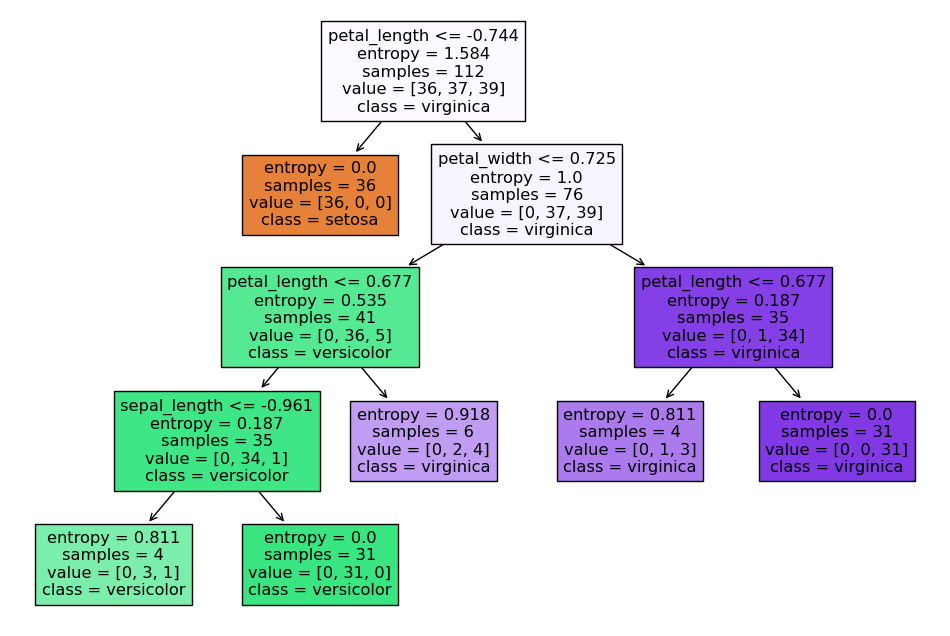

In [20]:
from sklearn import datasets
import pandas as pd


df = pd.read_csv("IRIS_DATASET.csv")
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

scale =  StandardScaler()
scale.fit(x)
x_scale = scale.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25 ,random_state = 40)


model = DecisionTreeClassifier(criterion='entropy', max_depth=5,min_samples_split=4,min_samples_leaf=4)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,recall_score,ConfusionMatrixDisplay
print('accuracy score is ',accuracy_score(y_test,y_pred))
print('f1_score is ',f1_score(y_test,y_pred,average=None))
print('precision is ',precision_score(y_test,y_pred,average = 'micro'))
print('recall_score is ',recall_score(y_test,y_pred,average = None))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
model.predict([[5.3,3,1.4,0.2]])
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=x.columns, class_names=model.classes_, filled=True)
plt.show()





In [10]:
model.predict([[5.3,3,1.4,0.2]])

array(['virginica'], dtype=object)

In [21]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

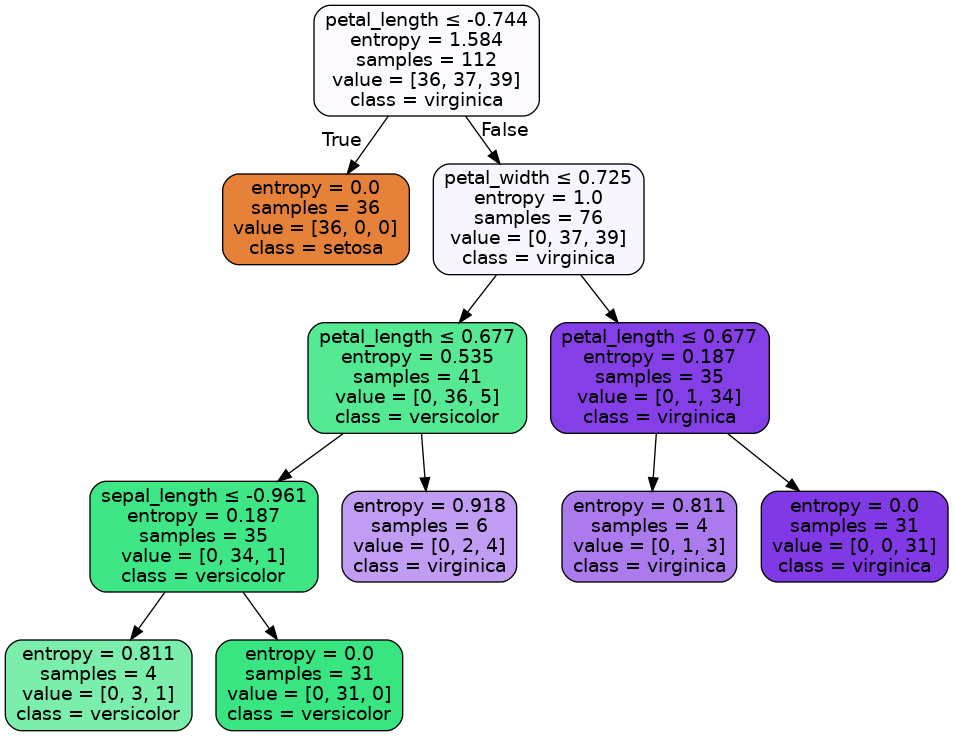

In [27]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x.columns,class_names=model.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())